In [22]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_signs'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_signs


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    
    Flatten(),

    Dense(num_classes, activation='softmax')
    ])
  
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callback]
      
  )

  return model

In [11]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 36.5708 - accuracy: 0.7002 - val_loss: 0.3144 - val_accuracy: 0.9270
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2642 - accuracy: 0.9418 - val_loss: 0.1497 - val_accuracy: 0.9647
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1472 - accuracy: 0.9665 - val_loss: 0.0764 - val_accuracy: 0.9826
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1419 - accuracy: 0.9694 - val_loss: 0.1281 - val_accuracy: 0.9706
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1144 - accuracy: 0.9747 - val_loss: 0.0617 - val_accuracy: 0.9865


In [0]:
y_pred_prob = model_trained.predict(X_test)

In [18]:
y_pred_prob[400]

array([1.81399088e-07, 2.07774295e-03, 3.70376147e-05, 8.88339902e-10,
       9.97858942e-01, 3.06353796e-11, 4.51181099e-16, 1.50239921e-05,
       2.39202184e-16, 1.10903120e-05, 1.64040848e-09, 3.43233503e-26,
       2.36699025e-21, 9.66653718e-14, 2.04731887e-21, 1.86042290e-16,
       3.06581673e-19, 0.00000000e+00, 1.59843442e-16, 1.13488075e-35,
       8.63903565e-33, 1.79999979e-33, 6.79266243e-33, 2.48812268e-18,
       3.28993486e-17, 4.00134068e-19, 7.51430740e-21, 6.41383835e-34,
       1.86128171e-16, 1.43425553e-22, 6.08836096e-28, 6.29446253e-27,
       1.58953611e-19, 1.71711155e-35, 1.13380391e-34, 2.48232956e-26,
       1.24953910e-38, 5.96979214e-32, 1.74563302e-24, 0.00000000e+00,
       1.64246973e-30, 0.00000000e+00, 6.64154669e-16], dtype=float32)

<BarContainer object of 43 artists>

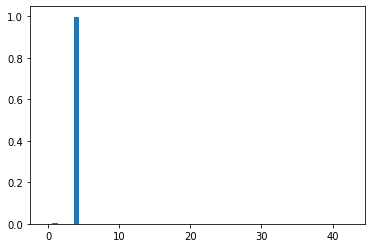

In [21]:
plt.bar(range(43), y_pred_prob[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)



In [27]:
predict(model_trained, X_test, y_test)

0.8183673469387756

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [31]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
    ])


train_and_predict(get_cnn_v2(input_shape, num_classes))

ERROR! Session/line number was not unique in database. History logging moved to new session 60
Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 8.1105 - accuracy: 0.2789 - val_loss: 1.7160 - val_accuracy: 0.5422
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 1.5376 - accuracy: 0.5444 - val_loss: 0.7886 - val_accuracy: 0.7907
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.8238 - accuracy: 0.7528 - val_loss: 0.2570 - val_accuracy: 0.9419
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.4842 - accuracy: 0.8555 - val_loss: 0.1339 - val_accuracy: 0.9705
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3385 - accuracy: 0.8986 - val_loss: 0.0797 - val_accuracy: 0.9823


0.9061224489795918

In [32]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
    ])


train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 13ms/step - loss: 2.1714 - accuracy: 0.4953 - val_loss: 0.4567 - val_accuracy: 0.8916
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.5789 - accuracy: 0.8194 - val_loss: 0.2551 - val_accuracy: 0.9489
Epoch 3/5
272/272 [==============================] - 3s 12ms/step - loss: 0.3829 - accuracy: 0.8786 - val_loss: 0.1156 - val_accuracy: 0.9686
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.3019 - accuracy: 0.9039 - val_loss: 0.0960 - val_accuracy: 0.9763
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2388 - accuracy: 0.9232 - val_loss: 0.0630 - val_accuracy: 0.9813


0.9328798185941043

In [34]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
    ])

#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 13ms/step - loss: 2.8449 - accuracy: 0.2568 - val_loss: 1.3901 - val_accuracy: 0.6098
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 1.0613 - accuracy: 0.6701 - val_loss: 0.3156 - val_accuracy: 0.8957
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.5153 - accuracy: 0.8367 - val_loss: 0.1577 - val_accuracy: 0.9545
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.3354 - accuracy: 0.8935 - val_loss: 0.0697 - val_accuracy: 0.9807
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2361 - accuracy: 0.9280 - val_loss: 0.0549 - val_accuracy: 0.9853


0.9668934240362812

In [36]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
    ])

#get_cnn_v5(input_shape, num_classes).summary()
train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.5987 - accuracy: 0.2815 - val_loss: 1.2641 - val_accuracy: 0.5785
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 1.0284 - accuracy: 0.6550 - val_loss: 0.3690 - val_accuracy: 0.8667
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4654 - accuracy: 0.8458 - val_loss: 0.1025 - val_accuracy: 0.9695
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2826 - accuracy: 0.9124 - val_loss: 0.0697 - val_accuracy: 0.9796
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2043 - accuracy: 0.9383 - val_loss: 0.0317 - val_accuracy: 0.9905


0.9682539682539683

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1,32,32,1)

In [47]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.5763 - accuracy: 0.2794 - val_loss: 0.6194 - val_accuracy: 0.8073
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4352 - accuracy: 0.8611 - val_loss: 0.0776 - val_accuracy: 0.9783
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1997 - accuracy: 0.9371 - val_loss: 0.0501 - val_accuracy: 0.9866
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1347 - accuracy: 0.9592 - val_loss: 0.0307 - val_accuracy: 0.9913
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.0976 - accuracy: 0.9707 - val_loss: 0.0209 - val_accuracy: 0.9938


0.9709750566893424

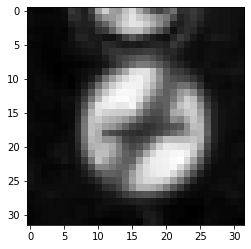

In [37]:
plt.imshow( color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray'))

In [20]:
labels_dict[ np.argmax( y_pred_prob[400] ) ]

'Speed limit (70km/h)'

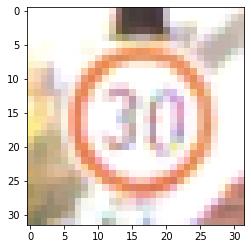

In [15]:
plt.imshow(X_test[400])